# Multivariate Linear Regression on Catagorized SMC 
- Vbur_min_x197 < 32

- Dataset: DFT_SMC, 90 of the ligands
- x = Multivariates, Selected Features
- y = Yields from rxn II, Sam's paper

Data preparation

In [54]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem import DataStructs
from rdkit import Chem
from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
from rdkit.Chem import rdChemReactions

In [55]:
# data
import pandas as pd
from rdkit import Chem
#from rxn_yields.data import generate_buchwald_hartwig_rxns
#df = pd.read_excel('../data/Buchwald-Hartwig/Dreher_and_Doyle_input_data.xlsx', sheet_name='FullCV_01')
df_origin = pd.read_excel('smc_data_catagorized.xlsx', sheet_name='Vbur_min32_x197')
df_origin = df_origin.sample(frac=1,random_state=42)
df_x = df_origin.drop(columns = ['SMILES','ID','ID.1','Unnamed: 0','y1','y2','y3','y4'])
df_x = df_x.drop(columns = ['y5','y6','y7','y8','y9','y10','y11','y12'])
df_x = df_x.drop(columns = ['y13','y14','y15','y16','y17','y18','y19','buch'])
df_x = df_x.drop(columns = ['x198','x199','x200','x201','x202','Unnamed: 110'])
df_y = df_origin[['x198']]

In [56]:
print('Shape of input:',df_x.shape,'\nShape of output:' ,df_y.shape)
df_x = df_x.astype(float)
df_y = df_y.astype(float)
#df_x.to_excel("output.xlsx") 

Shape of input: (61, 198) 
Shape of output: (61, 1)


Permutation for 3 features

In [57]:
# permutations using library function !!not successful
from itertools import permutations 

perm = permutations(df_x.columns)
print(perm)

Visualization - three features

In [58]:
def plot_three_features(df_x,i,j,k):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],color="red")
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    plt.show()

A plot of axis: x1 x2 , and  x3


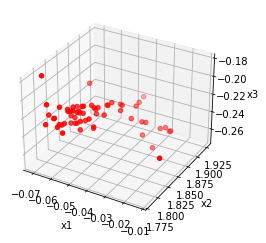

In [59]:
plot_three_features(df_x,'x1','x2','x3')

In [60]:
#This allows you to plot the 3d diagram of 2 features selected +1 feature from all features
for i in df_x.columns:
    #plot_three_features(df_x,i)
    continue

Splitting dataset

In [61]:
#Splitting dataset
train_x = df_x[:(int((len(df_x)*0.79)))]
train_y = df_y[:(int((len(df_x)*0.79)))]
test_x = df_x[(int((len(df_x)*0.79))):]
test_y = df_y[(int((len(df_x)*0.79))):]
print(train_x.shape)

(48, 198)


In [62]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x1 = np.array(train_x[["x1"]])
train_x2 = np.array(train_x[["x2"]])
regr.fit(train_x,train_y)

LinearRegression()

# MLR - with all features

In [63]:
#Not using this package
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_x)

In [64]:
def linear_reg_of_n_features(df_x,df_y):
    reg=linear_model.LinearRegression()     #initiating linearregression
    model = reg.fit(df_x,df_y)
    Intercept=reg.intercept_
    Coefficients=reg.coef_
    return Intercept, Coefficients, model
    

In [65]:
Intercept, Coefficients, model = linear_reg_of_n_features(train_x,train_y)

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg_predictions = model.predict(train_x)
reg_mse = mean_squared_error(train_y, reg_predictions)
reg_rmse = np.sqrt(reg_mse)
print("Training set RMSE:",reg_rmse)

reg_predictions2 = model.predict(test_x)
reg_mse2 = mean_squared_error(test_y, reg_predictions2)
reg_rmse2 = np.sqrt(reg_mse2)
print("Test set RMSE:",reg_rmse2)

r2_score2=r2_score(train_y, reg_predictions)
print("Training set R^2:",r2_score2)
r2_score3=r2_score(test_y, reg_predictions2)
print("Test set R^2:",r2_score3)

Training set RMSE: 1.055731974994991e-12
Test set RMSE: 57.66807457369341
Training set R^2: 1.0
Test set R^2: -3.236409882194865


In [67]:
print("Intercept:",Intercept,"Coefficient:",Coefficients)

Intercept: [-136.1611495] Coefficient: [[-1.58501142e-02 -5.66501698e-02  1.34421451e-02 -3.67621349e-03
   4.88296647e-03 -1.71183615e-02 -1.24692161e-02  1.19547025e-02
   4.75309481e-02 -2.69064636e-02 -1.18928784e-02 -3.40304313e-02
  -2.48318741e-01 -2.82367691e-01  3.86926262e-02  1.83893197e-01
   4.64147763e-01 -5.32069266e-01  2.17200258e-02 -8.62280370e-02
   7.85965102e-02  7.63479801e-03 -1.80617969e-02 -1.06255715e+00
  -1.29293805e+00  9.18809010e-03  2.02643657e-02  8.12835299e-03
   1.52655556e-02  4.06288128e-02  1.90298630e-02  8.88576104e-03
  -1.46284889e-03 -3.08729939e-03  8.75111894e-03 -1.74223549e+00
  -6.79678340e-01 -1.74878379e-02  3.85130344e-03 -1.50135823e-02
  -2.21412279e-01 -2.14082602e+00 -1.74990865e-02 -4.25280272e-01
   1.00597342e-01 -3.22651072e+00  1.41096447e+00 -2.48773081e-01
   7.70556834e-01  1.80730633e-02 -2.49878049e+00 -2.88096404e+00
  -3.73880597e-01  2.50708344e+00 -3.04127632e-02  7.21788762e-01
  -9.65487404e-01 -2.03189026e+00 -1.

# MLR - with 3 features

In [68]:
def linear_reg_of_3_features(df_x,df_y,i,j,k):
    df_3f = df_x[[i,j,k]]
    reg=linear_model.LinearRegression()     #initiating linearregression
    model = reg.fit(df_3f,df_y)
    Intercept=reg.intercept_
    Coefficients=reg.coef_
    return Intercept, Coefficients, model
    

In [69]:
def evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,i,j,k):
    reg_predictions = model.predict(train_x[[i,j,k]])
    train_mse = mean_squared_error(train_y, reg_predictions)
    train_rmse = "{:.2f}".format(np.sqrt(train_mse))

    reg_predictions2 = model.predict(test_x[[i,j,k]])
    test_mse = mean_squared_error(test_y, reg_predictions2)
    test_rmse = "{:.2f}".format(np.sqrt(test_mse))

    train_r2="{:.2f}".format(r2_score(train_y, reg_predictions))
    test_r2="{:.2f}".format(r2_score(test_y, reg_predictions2))
    return train_rmse, test_rmse, train_r2, test_r2

In [70]:
def evaluate_model_of_n_features(train_x,train_y,test_x,test_y,model):
    reg_predictions = model.predict(train_x)
    train_mse = mean_squared_error(train_y, reg_predictions)
    train_rmse = "{:.2f}".format(np.sqrt(train_mse))

    reg_predictions2 = model.predict(test_x)
    test_mse = mean_squared_error(test_y, reg_predictions2)
    test_rmse = "{:.2f}".format(np.sqrt(test_mse))

    train_r2="{:.2f}".format(r2_score(train_y, reg_predictions))
    test_r2="{:.2f}".format(r2_score(test_y, reg_predictions2))
    return train_rmse, test_rmse, train_r2, test_r2

In [71]:
#Combination of all columns from dataframe
def all_features(df):
    all_features = df.columns.values.tolist()
    return all_features

In [72]:
#This code actually generate a real combination of 3 features, but it just... contains too many for loops
all_feat = all_features(df_x)
def combination_any_3_features(all_feat):
    comb_3_feat = []
    for i in all_feat:
        for j in all_feat:
            for k in all_feat:
                if i!=j and j!=k and k!=i:
                    comb_3_feat.append([i,j,k])
        
    return comb_3_feat

In [73]:
def combination_any_2_features(all_feat,preset_feat):
    comb_2_feat = []
    for i in all_feat:
        for j in all_feat:
            if i!=j and i!=preset_feat and j!=preset_feat:
                comb_2_feat.append([preset_feat,i,j])
        
    return comb_2_feat

In [74]:
feats = combination_any_2_features(df_x,'x30')

In [75]:
all_feat.index('x1')

0

Do not re-do the feature combination generation because it cost time

In [76]:
#x1x2x3 x2x3x4 x3x4x5... a 'combination' that has 190~ elements so that I try things that aren't computational demanding
def fake_combination_any_3_features(df):
    comb_3_feat = []
    k="x1"
    for i in df.columns:
        while k != 'x197':
            j = df.columns[df.columns.get_loc(i)+1]
            k = df.columns[df.columns.get_loc(j)+1]
            if i !=j and j!=k and i!=k:
                print(i,j,k)
                comb_3_feat.append([i,j,k])
                i = df.columns[df.columns.get_loc(i)+1]
    return comb_3_feat

        

In [77]:
#df_x_set = combination_any_3_features(df_x)
#Run time: 24s

In [78]:
#Write down combination of any 3 features into a txt
#Txt already generated
"""
with open(r'all_features.txt', 'w') as fp:
    for item in df_x_set:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')
"""

'\nwith open(r\'all_features.txt\', \'w\') as fp:\n    for item in df_x_set:\n        # write each item on a new line\n        fp.write("%s\n" % item)\n    print(\'Done\')\n'

In [79]:
#Early attemps - trying to use mlr from math formular
"""
def hypothesis(theta, X):
    return theta*X
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            print(theta[c])
            theta[c] = theta[c] - alpha*(((y1.sum()-y.sum())*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta
"""

'\ndef hypothesis(theta, X):\n    return theta*X\ndef computeCost(X, y, theta):\n    y1 = hypothesis(theta, X)\n    y1=np.sum(y1, axis=1)\n    return sum(np.sqrt((y1-y)**2))/(2*47)\ndef gradientDescent(X, y, theta, alpha, i):\n    J = []  #cost function in each iterations\n    k = 0\n    while k < i:        \n        y1 = hypothesis(theta, X)\n        y1 = np.sum(y1, axis=1)\n        for c in range(0, len(X.columns)):\n            print(theta[c])\n            theta[c] = theta[c] - alpha*(((y1.sum()-y.sum())*X.iloc[:,c])/len(X))\n        j = computeCost(X, y, theta)\n        J.append(j)\n        k += 1\n    return J, j, theta\n'

# Screening over 3 features - 1 fixed + combination with 2

Features Combination - feats, a list, len(list) lines, each line with n number of features

In [80]:
# 1 pre-determined feature + all combination of 2 features = 3 features total
# df_x and train_x are both okay here... because the columns are the same
feats = combination_any_2_features(df_x,'x30')

In [81]:
# Numbers of combinations (197*196)
len(feats)

38612

In [ ]:
print('----------Linear regression of 3 features starts----------')
List_r2_4 = []
List_r2_3 = []
List_r2_2 = []
for m in feats:
    i = feats.index(m)
    Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
    #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
    #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    if float(test_r2) >=0.4: 
        print('Significant!')
        print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
        List_r2_4.append([feats[i][0],feats[i][1],feats[i][2]])
    elif float(test_r2) >=0.3:
        List_r2_3.append([feats[i][0],feats[i][1],feats[i][2]])
        

In [83]:
#To test with fake combination of 3 features
feats = fake_combination_any_3_features(df_x)

x1 x2 x3
x2 x3 x4
x3 x4 x5
x4 x5 x6
x5 x6 x7
x6 x7 x8
x7 x8 x9
x8 x9 x10
x9 x10 x11
x10 x11 x12
x11 x12 x13
x12 x13 x14
x13 x14 x15
x14 x15 x16
x15 x16 x17
x16 x17 x18
x17 x18 x19
x18 x19 x20
x19 x20 x21
x20 x21 x22
x21 x22 x23
x22 x23 x24
x23 x24 x25
x24 x25 x26
x25 x26 x27
x26 x27 x28
x27 x28 x29
x28 x29 x30
x29 x30 x31
x30 x31 x32
x31 x32 x33
x32 x33 x34
x33 x34 x35
x34 x35 x36
x35 x36 x37
x36 x37 x38
x37 x38 x39
x38 x39 x40
x39 x40 x41
x40 x41 x42
x41 x42 x43
x42 x43 x44
x43 x44 x45
x44 x45 x46
x45 x46 x47
x46 x47 x48
x47 x48 x49
x48 x49 x50
x49 x50 x51
x50 x51 x52
x51 x52 x53
x52 x53 x54
x53 x54 x55
x54 x55 x56
x55 x56 x57
x56 x57 x58
x57 x58 x59
x58 x59 x60
x59 x60 x61
x60 x61 x62
x61 x62 x63
x62 x63 x64
x63 x64 x65
x64 x65 x66
x65 x66 x67
x66 x67 x68
x67 x68 x69
x68 x69 x70
x69 x70 x71
x70 x71 x72
x71 x72 x73
x72 x73 x74
x73 x74 x75
x74 x75 x76
x75 x76 x77
x76 x77 x78
x77 x78 x79
x78 x79 x80
x79 x80 x81
x80 x81 x82
x81 x82 x83
x82 x83 x84
x83 x84 x85
x84 x85 179.59438003021648
x

In [ ]:
print('----------Linear regression of 3 features starts----------')
List_r2_4 = []
List_r2_3 = []
List_r2_2 = []
for m in feats:
    i = feats.index(m)
    Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
    #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
    #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    if float(test_r2) >=0.4: 
        print('Significant!')
        print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
        List_r2_4.append([feats[i][0],feats[i][1],feats[i][2]])
    elif float(test_r2) >=0.3:
        List_r2_3.append([feats[i][0],feats[i][1],feats[i][2]])

----------Linear regression of 3 features starts----------
Significant!
For features x6 x7 x8 : Intercept: [181.3062683] , Coefficient:  [[ -323.75255963 -1560.82170593  -355.56937676]]
Training rmse: 22.65 
Test rmse:  21.13 
Training r2: 0.26 
Test r2:  0.43
Significant!
For features x7 x8 x9 : Intercept: [143.09128347] , Coefficient:  [[-1306.85191196  -437.11982441    86.47997609]]
Training rmse: 23.05 
Test rmse:  20.98 
Training r2: 0.23 
Test r2:  0.44
Significant!
For features x49 x50 x51 : Intercept: [252.05019155] , Coefficient:  [[-4.92234614e-02 -2.39887498e+02 -1.39531387e+01]]
Training rmse: 21.64 
Test rmse:  20.63 
Training r2: 0.32 
Test r2:  0.46
Significant!
For features x50 x51 x52 : Intercept: [143.87314464] , Coefficient:  [[-128.01767378  -17.30892987    7.99583013]]
Training rmse: 21.65 
Test rmse:  21.58 
Training r2: 0.32 
Test r2:  0.41


In [ ]:
print(List_r2_4,List_r2_3)

[['x6', 'x7', 'x8'], ['x7', 'x8', 'x9'], ['x49', 'x50', 'x51'], ['x50', 'x51', 'x52']] [['x5', 'x6', 'x7'], ['x8', 'x9', 'x10'], ['x44', 'x45', 'x46'], ['x45', 'x46', 'x47'], ['x46', 'x47', 'x48']]


In [84]:
def combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y):
    print('----------Linear regression of 3 features starts----------')
    List_r2_4 = []
    List_r2_3 = []
    #List_r2_2 = []
    for m in feats:
        i = feats.index(m)
        Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
        #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
        #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
        if float(test_r2) >=0.4: 
            print('Significant!')
            print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
            print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
            List_r2_4.append([feats[i][0],feats[i][1],feats[i][2]])
        elif float(test_r2) >=0.3:
            List_r2_3.append([feats[i][0],feats[i][1],feats[i][2]])
    return List_r2_4,List_r2_3

Screening of some features that are significant from fake combination of 3 features

In [ ]:
# Don't use df_x and df_y, they are not splitted. Use train_x and etc
feats = combination_any_2_features(df_x,'x49')
List_r2_4_x49,List_r2_3_x49 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)


----------Linear regression of 3 features starts----------
Significant!
For features x49 x1 x150 : Intercept: [-35.74531833] , Coefficient:  [[ 3.48872795e-02 -9.35246071e+02  2.65108047e+01]]
Training rmse: 22.88 
Test rmse:  21.05 
Training r2: 0.24 
Test r2:  0.44
Significant!
For features x49 x2 x43 : Intercept: [801.28588777] , Coefficient:  [[-2.22748132e-02 -4.01830986e+02 -1.50315235e+02]]
Training rmse: 21.80 
Test rmse:  20.09 
Training r2: 0.31 
Test r2:  0.49
Significant!
For features x49 x2 x46 : Intercept: [441.58349407] , Coefficient:  [[ 2.33196117e-02 -2.61504673e+02  4.67825213e+00]]
Training rmse: 22.05 
Test rmse:  21.40 
Training r2: 0.30 
Test r2:  0.42
Significant!
For features x49 x2 x51 : Intercept: [417.80965209] , Coefficient:  [[ 3.56706273e-02 -2.13541662e+02 -6.39869959e+00]]
Training rmse: 21.90 
Test rmse:  20.94 
Training r2: 0.31 
Test r2:  0.44
Significant!
For features x49 x2 x79 : Intercept: [713.79664255] , Coefficient:  [[ 3.20013250e-02 -3.778173

In [ ]:
List_r2_4_x49

[['x49', 'x1', 'x150'],
 ['x49', 'x2', 'x43'],
 ['x49', 'x2', 'x46'],
 ['x49', 'x2', 'x51'],
 ['x49', 'x2', 'x79'],
 ['x49', 'x2', 'x88'],
 ['x49', 'x2', 'x89'],
 ['x49', 'x2', 'x139'],
 ['x49', 'x2', 'x144'],
 ['x49', 'x2', 'x148'],
 ['x49', 'x2', 'x149'],
 ['x49', 'x2', 'x150'],
 ['x49', 'x2', 'x154'],
 ['x49', 'x2', 'x158'],
 ['x49', 'x2', 'x159'],
 ['x49', 'x2', 'x182'],
 ['x49', 'x2', 'x184'],
 ['x49', 'x2', 'x187'],
 ['x49', 'x2', 'x189'],
 ['x49', 'x2', 'x191'],
 ['x49', 'x3', 'x51'],
 ['x49', 'x3', 'x150'],
 ['x49', 'x4', 'x7'],
 ['x49', 'x4', 'x46'],
 ['x49', 'x4', 'x51'],
 ['x49', 'x4', 'x182'],
 ['x49', 'x5', 'x43'],
 ['x49', 'x5', 'x51'],
 ['x49', 'x5', 'x150'],
 ['x49', 'x5', 'x182'],
 ['x49', 'x6', 'x46'],
 ['x49', 'x7', 'x4'],
 ['x49', 'x7', 'x8'],
 ['x49', 'x7', 'x11'],
 ['x49', 'x7', 'x32'],
 ['x49', 'x7', 'x39'],
 ['x49', 'x7', 'x43'],
 ['x49', 'x7', 'x46'],
 ['x49', 'x7', 'x51'],
 ['x49', 'x7', 'x150'],
 ['x49', 'x7', 'x167'],
 ['x49', 'x7', 'x182'],
 ['x49', 'x7', '

In [ ]:
feats = combination_any_2_features(df_x,'x178')
List_r2_4_x178,List_r2_3_x178 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x178 x2 x43 : Intercept: [840.97668134] , Coefficient:  [[  -8.51838898 -408.01077948 -148.79947639]]
Training rmse: 21.65 
Test rmse:  19.80 
Training r2: 0.32 
Test r2:  0.50
Significant!
For features x178 x2 x44 : Intercept: [626.46345741] , Coefficient:  [[  -9.6117548  -374.83548293    6.88326961]]
Training rmse: 21.85 
Test rmse:  21.35 
Training r2: 0.31 
Test r2:  0.42
Significant!
For features x178 x2 x50 : Intercept: [867.60979506] , Coefficient:  [[ -13.16321229 -355.84111894 -172.04607443]]
Training rmse: 21.69 
Test rmse:  20.77 
Training r2: 0.32 
Test r2:  0.45
Significant!
For features x178 x2 x167 : Intercept: [628.6039794] , Coefficient:  [[  -1.33257136 -336.44717942    3.43787817]]
Training rmse: 22.34 
Test rmse:  21.68 
Training r2: 0.28 
Test r2:  0.40
Significant!
For features x178 x2 x181 : Intercept: [561.53782458] , Coefficient:  [[ -22.23629134 -296.7589885    17.33136441]]


In [ ]:
len(List_r2_4_x178)

232

In [ ]:
feats = combination_any_2_features(df_x,'x35')
List_r2_4_x35,List_r2_3_x35 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x35 x2 x43 : Intercept: [756.80431261] , Coefficient:  [[ 321.84970796 -393.27485947 -102.78355129]]
Training rmse: 21.82 
Test rmse:  20.93 
Training r2: 0.31 
Test r2:  0.44
Significant!
For features x35 x2 x182 : Intercept: [581.51288882] , Coefficient:  [[ 420.19766972 -345.79103537   11.1883573 ]]
Training rmse: 20.84 
Test rmse:  21.77 
Training r2: 0.37 
Test r2:  0.40
Significant!
For features x35 x2 x187 : Intercept: [647.15094026] , Coefficient:  [[-209.26046153 -389.32636283   15.47590729]]
Training rmse: 22.13 
Test rmse:  21.62 
Training r2: 0.29 
Test r2:  0.40
Significant!
For features x35 x4 x182 : Intercept: [-96.92129431] , Coefficient:  [[278.83866351 439.65072288  20.61284465]]
Training rmse: 20.97 
Test rmse:  21.23 
Training r2: 0.36 
Test r2:  0.43
Significant!
For features x35 x5 x43 : Intercept: [138.02131451] , Coefficient:  [[-253.07327247  613.19800719 -147.99140359]]
Traini

In [ ]:
len(List_r2_4_x35)

280

In [ ]:
feats = combination_any_2_features(df_x,'x180')
List_r2_5_x180,List_r2_4_x180 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x180 x7 x182 : Intercept: [-57.7624068] , Coefficient:  [[   8.68315812 -854.27873091   14.20775032]]
Training rmse: 20.40 
Test rmse:  19.72 
Training r2: 0.40 
Test r2:  0.50
Significant!
For features x180 x28 x150 : Intercept: [247.41134298] , Coefficient:  [[ 12.98261388 590.51196955  24.08628263]]
Training rmse: 21.99 
Test rmse:  19.69 
Training r2: 0.30 
Test r2:  0.51
Significant!
For features x180 x51 x182 : Intercept: [-35.73404429] , Coefficient:  [[ -0.1595328  -13.28227869  14.90717723]]
Training rmse: 20.18 
Test rmse:  18.66 
Training r2: 0.41 
Test r2:  0.56
Significant!
For features x180 x150 x28 : Intercept: [247.41134298] , Coefficient:  [[ 12.98261388  24.08628263 590.51196955]]
Training rmse: 21.99 
Test rmse:  19.69 
Training r2: 0.30 
Test r2:  0.51
Significant!
For features x180 x182 x7 : Intercept: [-57.7624068] , Coefficient:  [[   8.68315812   14.20775032 -854.27873091]]
Trai

In [ ]:
len(List_r2_5_x180)

164

In [ ]:
feats = combination_any_2_features(df_x,'x177')
List_r2_4_x177,List_r2_3_x177 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x177 x1 x182 : Intercept: [-48.08702563] , Coefficient:  [[ -10.57976091 -653.94575641   13.45560027]]
Training rmse: 21.46 
Test rmse:  21.23 
Training r2: 0.33 
Test r2:  0.43
Significant!
For features x177 x2 x43 : Intercept: [740.60879964] , Coefficient:  [[   0.81958364 -379.83353857 -103.46682748]]
Training rmse: 21.88 
Test rmse:  20.63 
Training r2: 0.31 
Test r2:  0.46
Significant!
For features x177 x2 x182 : Intercept: [477.07967471] , Coefficient:  [[  -5.75746096 -274.3357438    12.69740313]]
Training rmse: 20.86 
Test rmse:  21.30 
Training r2: 0.37 
Test r2:  0.42
Significant!
For features x177 x4 x182 : Intercept: [-60.9616638] , Coefficient:  [[ -7.53334401 347.62245215  20.55900727]]
Training rmse: 20.83 
Test rmse:  21.43 
Training r2: 0.37 
Test r2:  0.41
Significant!
For features x177 x5 x43 : Intercept: [143.61461261] , Coefficient:  [[  -5.28536304  565.45727644 -154.67278181]]
Tr

In [ ]:
feats = combination_any_2_features(df_x,'x172')
List_r2_4_x172,List_r2_3_x172 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x172 x1 x150 : Intercept: [-73.24063941] , Coefficient:  [[   6.49180795 -983.41323239   37.59795642]]
Training rmse: 21.82 
Test rmse:  20.78 
Training r2: 0.31 
Test r2:  0.45
Significant!
For features x172 x2 x10 : Intercept: [614.84320604] , Coefficient:  [[   6.35184265 -364.6960927    45.28872398]]
Training rmse: 21.02 
Test rmse:  21.52 
Training r2: 0.36 
Test r2:  0.41
Significant!
For features x172 x2 x11 : Intercept: [619.23910415] , Coefficient:  [[   6.40866848 -358.73299555   26.54736699]]
Training rmse: 20.98 
Test rmse:  21.59 
Training r2: 0.36 
Test r2:  0.41
Significant!
For features x172 x2 x12 : Intercept: [640.12679886] , Coefficient:  [[   6.52072315 -359.25779894  -25.7996339 ]]
Training rmse: 20.99 
Test rmse:  21.68 
Training r2: 0.36 
Test r2:  0.40
Significant!
For features x172 x2 x15 : Intercept: [650.42645208] , Coefficient:  [[ 6.48770871e+00 -3.57357927e+02 -4.85059829e

In [ ]:
feats = combination_any_2_features(df_x,'x4')
List_r2_7_x4,List_r2_6_x4 = combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
List_r2_6_x4

[['x4', 'x51', 'x182'], ['x4', 'x182', 'x51']]

# 3 Features MLR with 0.7, 0.6, 0.5 R^2

In [85]:
def combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y):
    print('----------Linear regression of 3 features starts----------')
    List_r2_7 = []
    List_r2_6 = []
    List_r2_5 = []
    for m in feats:
        i = feats.index(m)
        Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
        #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
        #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
        if float(test_r2) >=0.7: 
            print('Significant!')
            print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
            print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
            List_r2_7.append([feats[i][0],feats[i][1],feats[i][2]])
        elif float(test_r2) >=0.6:
            List_r2_6.append([feats[i][0],feats[i][1],feats[i][2]])
        elif float(test_r2) >=0.5:
            List_r2_5.append([feats[i][0],feats[i][1],feats[i][2]])
    return List_r2_7,List_r2_6, List_r2_5

In [86]:
def combination_of_features_doing_MLR_7_2r2(feats,train_x,train_y,test_x,test_y):
    print('----------Linear regression of 3 features starts----------')
    List_r2_7 = []
    List_r2_6 = []
    List_r2_5 = []
    for m in feats:
        i = feats.index(m)
        Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
        #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
        #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
        if float(test_r2)>0.7 and float(train_r2)>=0.7: 
            print('Significant!')
            print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
            print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
            List_r2_7.append([feats[i][0],feats[i][1],feats[i][2]])
        elif float(test_r2) >=0.6 and float(train_r2)>=0.6:
            List_r2_6.append([feats[i][0],feats[i][1],feats[i][2]])
        elif float(test_r2) >=0.5 and float(train_r2)>=0.5:
            List_r2_5.append([feats[i][0],feats[i][1],feats[i][2]])
    return List_r2_7,List_r2_6, List_r2_5

In [ ]:
feats = combination_any_2_features(df_x,'x182')
List_r2_7_x182,List_r2_6_x182,List_r2_5_x182 = combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

In [ ]:
List_r2_6_x182

[['x182', 'x2', 'x51'],
 ['x182', 'x4', 'x51'],
 ['x182', 'x5', 'x51'],
 ['x182', 'x6', 'x51'],
 ['x182', 'x7', 'x51'],
 ['x182', 'x8', 'x51'],
 ['x182', 'x39', 'x51'],
 ['x182', 'x51', 'x2'],
 ['x182', 'x51', 'x4'],
 ['x182', 'x51', 'x5'],
 ['x182', 'x51', 'x6'],
 ['x182', 'x51', 'x7'],
 ['x182', 'x51', 'x8'],
 ['x182', 'x51', 'x39'],
 ['x182', 'x51', 'x176'],
 ['x182', 'x176', 'x51']]

In [ ]:
feats = combination_any_2_features(df_x,'x51')
List_r2_7_x51,List_r2_6_x51,List_r2_5_x51 = combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
List_r2_6_x51

[['x51', 'x2', 'x182'],
 ['x51', 'x4', 'x182'],
 ['x51', 'x5', 'x182'],
 ['x51', 'x6', 'x182'],
 ['x51', 'x7', 'x182'],
 ['x51', 'x8', 'x182'],
 ['x51', 'x39', 'x182'],
 ['x51', 'x176', 'x182'],
 ['x51', 'x182', 'x2'],
 ['x51', 'x182', 'x4'],
 ['x51', 'x182', 'x5'],
 ['x51', 'x182', 'x6'],
 ['x51', 'x182', 'x7'],
 ['x51', 'x182', 'x8'],
 ['x51', 'x182', 'x39'],
 ['x51', 'x182', 'x176']]

In [ ]:
feats = combination_any_2_features(df_x,'x30')
List_r2_7_x30,List_r2_6_x30,List_r2_5_x30 = combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
List_r2_6_x30

[]

In [ ]:
List_r2_5_x30

[['x30', 'x51', 'x182'], ['x30', 'x182', 'x51']]

In [ ]:
feats = combination_any_2_features(df_x,'x50')
List_r2_7_x50,List_r2_6_x50, List_r2_5_x50= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
print(len(List_r2_6_x50),len(List_r2_5_x50))

0 100


In [ ]:
List_r2_5_x50[50:70]

[['x50', 'x51', 'x184'],
 ['x50', 'x53', 'x66'],
 ['x50', 'x66', 'x46'],
 ['x50', 'x66', 'x53'],
 ['x50', 'x70', 'x51'],
 ['x50', 'x71', 'x184'],
 ['x50', 'x77', 'x28'],
 ['x50', 'x79', 'x28'],
 ['x50', 'x83', 'x28'],
 ['x50', 'x84', 'x28'],
 ['x50', 'x88', 'x28'],
 ['x50', 'x89', 'x2'],
 ['x50', 'x89', 'x28'],
 ['x50', 'x97', 'x51'],
 ['x50', 'x98', 'x28'],
 ['x50', 'x99', 'x28'],
 ['x50', 'x100', 'x51'],
 ['x50', 'x113', 'x28'],
 ['x50', 'x114', 'x28'],
 ['x50', 'x115', 'x51']]

In [ ]:
feats = combination_any_2_features(df_x,'x4')
List_r2_7_x4,List_r2_6_x4, List_r2_5_x4= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
print(len(List_r2_6_x4),len(List_r2_5_x4))

2 22


In [ ]:
feats = combination_any_2_features(df_x,'x49')
List_r2_7_x49,List_r2_6_x49, List_r2_5_x49= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
print(len(List_r2_6_x49),len(List_r2_5_x49))

0 6


In [ ]:
feats = combination_any_2_features(df_x,'x30')
List_r2_7_x30,List_r2_6_x30, List_r2_5_x30= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
print(len(List_r2_6_x30),len(List_r2_5_x30))

0 2


In [ ]:
feats = combination_any_2_features(df_x,'x29')
List_r2_7_x29,List_r2_6_x29, List_r2_5_x29= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
print(len(List_r2_6_x29),len(List_r2_5_x29))

0 12


In [ ]:
feats = combination_any_2_features(df_x,'x28')
List_r2_7_x28,List_r2_6_x28, List_r2_5_x28= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
print(len(List_r2_6_x28),len(List_r2_5_x28))

4 328


In [ ]:
List_r2_6_x28

[['x28', 'x17', 'x77'],
 ['x28', 'x17', 'x83'],
 ['x28', 'x77', 'x17'],
 ['x28', 'x83', 'x17']]

In [ ]:
List_r2_5_x28[60:80]

[['x28', 'x51', 'x50'],
 ['x28', 'x51', 'x79'],
 ['x28', 'x51', 'x167'],
 ['x28', 'x51', 'x182'],
 ['x28', 'x71', 'x182'],
 ['x28', 'x76', 'x17'],
 ['x28', 'x76', 'x82'],
 ['x28', 'x77', 'x8'],
 ['x28', 'x77', 'x10'],
 ['x28', 'x77', 'x15'],
 ['x28', 'x77', 'x18'],
 ['x28', 'x77', 'x43'],
 ['x28', 'x77', 'x44'],
 ['x28', 'x77', 'x50'],
 ['x28', 'x77', 'x100'],
 ['x28', 'x77', 'x166'],
 ['x28', 'x77', 'x167'],
 ['x28', 'x77', 'x181'],
 ['x28', 'x77', 'x182'],
 ['x28', 'x77', 'x183']]

In [ ]:
feats = combination_any_2_features(df_x,'x22')
List_r2_7_x22,List_r2_6_x22, List_r2_5_x22= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
print(len(List_r2_6_x22),len(List_r2_5_x22))

0 4


In [ ]:
feats = combination_any_2_features(df_x,'x23')
List_r2_7_x23,List_r2_6_x23, List_r2_5_x23= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
print(len(List_r2_6_x23),len(List_r2_5_x23))

0 28


In [ ]:
feats = combination_any_2_features(df_x,'x24')
List_r2_7_x24,List_r2_6_x24, List_r2_5_x24= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [ ]:
print(len(List_r2_6_x24),len(List_r2_5_x24))

0 24


In [87]:
feats = combination_any_2_features(df_x,'x4')
List_2r2_7_x4,List_2r2_6_x4, List_2r2_5_x4= combination_of_features_doing_MLR_7_2r2(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


# Evaluation and Cross validation with any selection of features

In [88]:
from sklearn.model_selection import cross_val_score
df_x=df_x.sample(frac=1,random_state=92)
df_y = df_y.sample(frac=1,random_state = 92)

In [89]:
# This program auto - split the data, so safe to use df_x and df_y as input. 
# Make sure to cut df_x beforehand into a df with chosen amount of features.
def fold_5_cross_validation(df_x,df_y):
    train_x = df_x[:(int((len(df_x)*0.79)))]
    train_y = df_y[:(int((len(df_x)*0.79)))]
    test_x = df_x[(int((len(df_x)*0.79))):]
    test_y = df_y[(int((len(df_x)*0.79))):]
    Intercept, Coefficients, regg = linear_reg_of_n_features(train_x,train_y)
    print('Intercept:',Intercept,', Coefficient: ',Coefficients)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_n_features(train_x,train_y,test_x,test_y,regg)
    print('Training set RMSE:',train_rmse, '\nTest set RMSE: ',test_rmse, '\nTraining set R^2:',train_r2, '\nTest set R^2: ',test_r2 )
    cvd_scores = cross_val_score(regg, df_x, df_y, cv=5,scoring="r2")
    sum_cvd = sum(cvd_scores)
    print('5 fold Cross Validation score: ',sum_cvd)

In [90]:
df_3f = df_x[['x4','x182','x51']]
fold_5_cross_validation(df_3f,df_y)

Intercept: [-52.77365483] , Coefficient:  [[140.14420467  18.22759945 -12.47232024]]
Training set RMSE: 19.48 
Test set RMSE:  19.04 
Training set R^2: 0.50 
Test set R^2:  0.30
5 fold Cross Validation score:  1.5656621985086914


A plot of axis: x8 x182 , and  x51


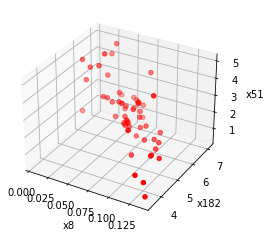

In [ ]:
plot_three_features(df_x,'x8','x182','x51')

A plot of axis: x28 x182 , and  x51


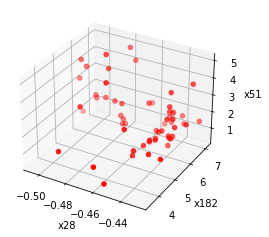

In [ ]:
plot_three_features(df_x,'x28','x182','x51')

In [91]:
df_3f = df_x[['x176','x77','x165']]
fold_5_cross_validation(df_3f,df_y)

Intercept: [142.88482494] , Coefficient:  [[ -16.67115775 -134.60553179   18.25736693]]
Training set RMSE: 26.29 
Test set RMSE:  22.83 
Training set R^2: 0.09 
Test set R^2:  -0.01
5 fold Cross Validation score:  -0.5621821841331394


Best combination of features in Sigman's code: x180, x24, x25, x29, x40, x57, x70

In [ ]:
df_7f = df_x[['x24','x180','x25','x29','x40','x57','x70']]
fold_5_cross_validation(df_7f,df_y)

Intercept: [198.3577779] , Coefficient:  [[ -1.08450836  12.82574989  -0.56331746 405.69905463 -53.26203969
   -1.6131095    0.52004398]]
Training set RMSE: 21.52 
Test set RMSE:  23.80 
Training set R^2: 0.38 
Test set R^2:  -0.02
5 fold Cross Validation score:  [-2.71261737 -0.09135197 -0.34263274 -0.28385431  0.01360143]


Further adding features

In [ ]:
df_3f = df_x[['x4','x182','x51','x2','x176']]
fold_5_cross_validation(df_3f,df_y)

Intercept: [226.95951503] , Coefficient:  [[ -20.42283456   23.99931968  -10.84845604 -113.11269987  -27.82771748]]
Training set RMSE: 18.65 
Test set RMSE:  18.16 
Training set R^2: 0.53 
Test set R^2:  0.35
5 fold Cross Validation score:  [0.53257007 0.22489316 0.47414219 0.5232861  0.33974992]


In [ ]:
df_3f = df_x[['x182','x51','x176']]
fold_5_cross_validation(df_3f,df_y)

Intercept: [21.1035971] , Coefficient:  [[ 25.01593793 -12.76118563 -28.72647768]]
Training set RMSE: 18.86 
Test set RMSE:  19.12 
Training set R^2: 0.52 
Test set R^2:  0.28
5 fold Cross Validation score:  [0.50654547 0.35364688 0.44785556 0.58109122 0.27080927]


A plot of axis: x182 x51 , and  x176


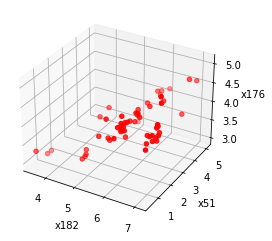

In [ ]:
plot_three_features(df_x,'x182','x51','x176')

In [ ]:
df_3f = df_x[['x4','x51','x182','x61','x56']]
fold_5_cross_validation(df_3f,df_y)

Intercept: [-50.26012722] , Coefficient:  [[84.63443995 -9.97894162 17.80186333  2.22784252 -2.33506572]]
Training set RMSE: 19.76 
Test set RMSE:  16.38 
Training set R^2: 0.48 
Test set R^2:  0.47
5 fold Cross Validation score:  [0.54584205 0.14846285 0.38987859 0.47691137 0.45354957]


# Streamline changing random state kill coincidence

In [ ]:
def fold_5_cross_validation_for_stream(df_x,df_y):
    train_x = df_x[:(int((len(df_x)*0.79)))]
    train_y = df_y[:(int((len(df_x)*0.79)))]
    test_x = df_x[(int((len(df_x)*0.79))):]
    test_y = df_y[(int((len(df_x)*0.79))):]
    Intercept, Coefficients, regg = linear_reg_of_n_features(train_x,train_y)
    #print('Intercept:',Intercept,', Coefficient: ',Coefficients)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_n_features(train_x,train_y,test_x,test_y,regg)
    #print('Training set RMSE:',train_rmse, '\nTest set RMSE: ',test_rmse, '\nTraining set R^2:',train_r2, '\nTest set R^2: ',test_r2 )
    cvd_scores = cross_val_score(regg, df_x, df_y, cv=5)
    sum_cvd = sum(cvd_scores)
    print('5 fold Cross Validation score: ',sum_cvd)
    return sum_cvd

In [ ]:
fold_5_cross_validation_for_stream(df_x,df_y)

5 fold Cross Validation score:  -71.73017084746752


-71.73017084746752

In [ ]:
fold_5_cross_validation_for_stream(df_x[['x50','x28','x4']],df_y)

5 fold Cross Validation score:  0.6494237649146346


0.6494237649146346

In [92]:
comb1=0
comb2 =0
comb3=0
for i in range(1,90):
    df_x=df_x.sample(frac=1,random_state=i)
    df_y = df_y.sample(frac=1,random_state = i)
    df_3f = df_x[['x8','x51','x182']]
    comb1 += fold_5_cross_validation_for_stream(df_3f,df_y)
    df_3f = df_x[['x2','x77','x176']]
    comb2 += fold_5_cross_validation_for_stream(df_3f,df_y)
    df_7f = df_x[['x24','x180','x25','x29','x40','x57','x70']]
    comb3 += fold_5_cross_validation_for_stream(df_7f,df_y)

5 fold Cross Validation score:  1.8068867094013286
5 fold Cross Validation score:  -0.020017114481011955
5 fold Cross Validation score:  -0.1756619431289943
5 fold Cross Validation score:  1.9213497060123168
5 fold Cross Validation score:  0.5176314444532659
5 fold Cross Validation score:  0.6233955647163101
5 fold Cross Validation score:  2.2727651616542173
5 fold Cross Validation score:  0.5667359096264509
5 fold Cross Validation score:  0.5518438595186966
5 fold Cross Validation score:  2.0440881523065295
5 fold Cross Validation score:  0.6737225537466306
5 fold Cross Validation score:  0.1224229806863778
5 fold Cross Validation score:  1.375391974357132
5 fold Cross Validation score:  0.03887499252249815
5 fold Cross Validation score:  -0.0025275352867903944
5 fold Cross Validation score:  2.187266870735838
5 fold Cross Validation score:  0.46141238927152306
5 fold Cross Validation score:  0.31619038468755756
5 fold Cross Validation score:  2.021601963336418
5 fold Cross Validation

In [93]:
print(comb1,comb2,comb3)

164.70922864118137 33.1014682861128 -10.964289950486197


In [ ]:
comb1=0
comb2 =0
comb3=0
for i in range(1,90):
    df_x=df_x.sample(frac=1,random_state=i)
    df_y = df_y.sample(frac=1,random_state = i)
    df_3f = df_x[['x4','x182','x51']]
    comb1 += fold_5_cross_validation_for_stream(df_3f,df_y)
    df_3f = df_x[['x8','x182','x51']]
    comb2 += fold_5_cross_validation_for_stream(df_3f,df_y)
    df_7f = df_x[['x8','x182','x51','x17']]
    comb3 += fold_5_cross_validation_for_stream(df_7f,df_y)

5 fold Cross Validation score:  1.746151768416004
5 fold Cross Validation score:  2.0068829718141563
5 fold Cross Validation score:  1.9898308062122898
5 fold Cross Validation score:  1.700741386031867
5 fold Cross Validation score:  1.8468793187807089
5 fold Cross Validation score:  1.7688649161222458
5 fold Cross Validation score:  2.245254217749388
5 fold Cross Validation score:  2.3379437703770227
5 fold Cross Validation score:  2.2413471114180568
5 fold Cross Validation score:  1.6932554573442316
5 fold Cross Validation score:  1.864332852360691
5 fold Cross Validation score:  1.86125061101104
5 fold Cross Validation score:  1.32276340808488
5 fold Cross Validation score:  1.4559613657361075
5 fold Cross Validation score:  1.446866289597518
5 fold Cross Validation score:  1.9861630912028099
5 fold Cross Validation score:  2.063193902984675
5 fold Cross Validation score:  1.7938391532132998
5 fold Cross Validation score:  1.8067367748094074
5 fold Cross Validation score:  1.9726690

In [ ]:
print(comb1,comb2,comb3)

134.12529328641125 148.40544819671538 145.48794875207898


In [ ]:
val_score_list = []
feats = fake_combination_any_3_features(df_x)

for i in feats:
    score = 0
    for j in range(1,90):
        df_x=df_x.sample(frac=1,random_state=j)
        df_y = df_y.sample(frac=1,random_state = j)
        score += fold_5_cross_validation_for_stream(df_x[i],df_y)
    val_score_list.append(score)

x1 x2 x3
x2 x3 x4
x3 x4 x5
x4 x5 x6
x5 x6 x7
x6 x7 x8
x7 x8 x9
x8 x9 x10
x9 x10 x11
x10 x11 x12
x11 x12 x13
x12 x13 x14
x13 x14 x15
x14 x15 x16
x15 x16 x17
x16 x17 x18
x17 x18 x19
x18 x19 x20
x19 x20 x21
x20 x21 x22
x21 x22 x23
x22 x23 x24
x23 x24 x25
x24 x25 x26
x25 x26 x27
x26 x27 x28
x27 x28 x29
x28 x29 x30
x29 x30 x31
x30 x31 x32
x31 x32 x33
x32 x33 x34
x33 x34 x35
x34 x35 x36
x35 x36 x37
x36 x37 x38
x37 x38 x39
x38 x39 x40
x39 x40 x41
x40 x41 x42
x41 x42 x43
x42 x43 x44
x43 x44 x45
x44 x45 x46
x45 x46 x47
x46 x47 x48
x47 x48 x49
x48 x49 x50
x49 x50 x51
x50 x51 x52
x51 x52 x53
x52 x53 x54
x53 x54 x55
x54 x55 x56
x55 x56 x57
x56 x57 x58
x57 x58 x59
x58 x59 x60
x59 x60 x61
x60 x61 x62
x61 x62 x63
x62 x63 x64
x63 x64 x65
x64 x65 x66
x65 x66 x67
x66 x67 x68
x67 x68 x69
x68 x69 x70
x69 x70 x71
x70 x71 x72
x71 x72 x73
x72 x73 x74
x73 x74 x75
x74 x75 x76
x75 x76 x77
x76 x77 x78
x77 x78 x79
x78 x79 x80
x79 x80 x81
x80 x81 x82
x81 x82 x83
x82 x83 x84
x83 x84 x85
x84 x85 179.59438003021648
x

In [ ]:
data = pd.DataFrame(val_score_list)
data.to_excel('output.xlsx')

# Summary

x4, x51 and x182 are more significant than other features.
 also improves the result
 feature 182 is somehow very important for crossvalidatoin score

x8 substitudes x4 pretty well, and gives a even higher yield. Can the mechanism involve single electron process?

x28, x50, and another feature might be x77, are also able to have somewhat better score in crossvalidation model.